In [1]:
%pylab inline
import numpy as np
from sklearn.cross_validation import train_test_split

Populating the interactive namespace from numpy and matplotlib


In [2]:
# load train and test data
mnist_train = np.loadtxt('../data/train.csv', delimiter=',', dtype=int, skiprows=1)
mnist_test = np.loadtxt('../data/test.csv', delimiter=',', dtype=int, skiprows=1)

In [3]:
# split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(mnist_train[:,1:], mnist_train[:,0])

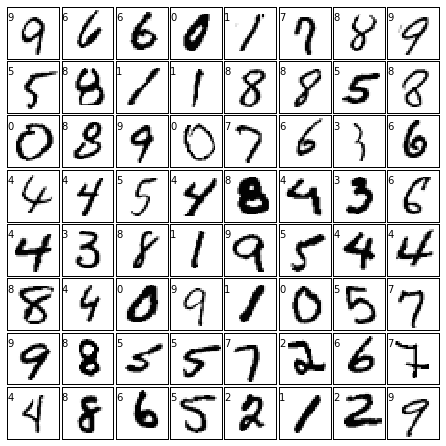

In [4]:
# copied from notebook 02A_representation_of_data.ipynb
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(X_train[i].reshape(28, 28), cmap=plt.cm.Greys, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(y_train[i]))

In [113]:
# parameters
n_components = 3
n_classes = 3
n_estimators = 30
pairs = [[0, 1], [0, 2], [1, 2]]

In [163]:
#from sklearn.decomposition import RandomizedPCA
pca = RandomizedPCA(n_components=n_components)
proj_train = pca.fit_transform(X_train)
proj_test = pca.fit_transform(X_test)
#from sklearn.manifold import Isomap
#iso = Isomap(n_components=n_components)
#proj_train = iso.fit_transform(X_train)
#proj_test = iso.fit_transform(X_test)

<matplotlib.colorbar.Colorbar instance at 0x000000008DEBF2C8>

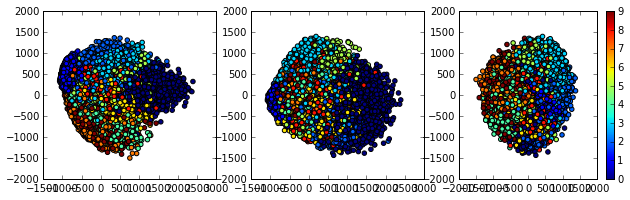

In [170]:
figure(num=1, figsize=(18, 3), dpi=100, facecolor='w', edgecolor='k') # plot results
plot_idx = 1
for pair in pairs:
    plt.subplot(1, len(clfs), plot_idx)
    plt.scatter(proj_train[:, pair[0]], proj_train[:, pair[1]], c=y_train)
    plot_idx += 1
plt.colorbar()

In [191]:
# http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_iris.html
from sklearn import clone
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier)
from sklearn.externals.six.moves import xrange
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [194]:
# train the models
models = [DecisionTreeClassifier(max_depth=None),
          RandomForestClassifier(n_estimators=n_estimators),
          ExtraTreesClassifier(n_estimators=n_estimators),
          AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), n_estimators=n_estimators),
          GradientBoostingClassifier(n_estimators=n_estimators),
          GaussianNB(),
          SVC(kernel='rbf')]

('DecisionTree with features', [0, 1], 'has a score of', 0.37380952380952381)
('RandomForest with 30 estimators with features', [0, 1], 'has a score of', 0.41057142857142859)
('ExtraTrees with 30 estimators with features', [0, 1], 'has a score of', 0.41047619047619049)
('AdaBoost with 30 estimators with features', [0, 1], 'has a score of', 0.38600000000000001)
('GradientBoosting with 30 estimators with features', [0, 1], 'has a score of', 0.45676190476190476)
('GaussianNB with features', [0, 1], 'has a score of', 0.43961904761904763)
('SVC with features', [0, 1], 'has a score of', 0.15342857142857144)
('DecisionTree with features', [0, 2], 'has a score of', 0.28819047619047616)
('RandomForest with 30 estimators with features', [0, 2], 'has a score of', 0.31552380952380954)
('ExtraTrees with 30 estimators with features', [0, 2], 'has a score of', 0.31295238095238093)
('AdaBoost with 30 estimators with features', [0, 2], 'has a score of', 0.34371428571428569)
('GradientBoosting with 30 e

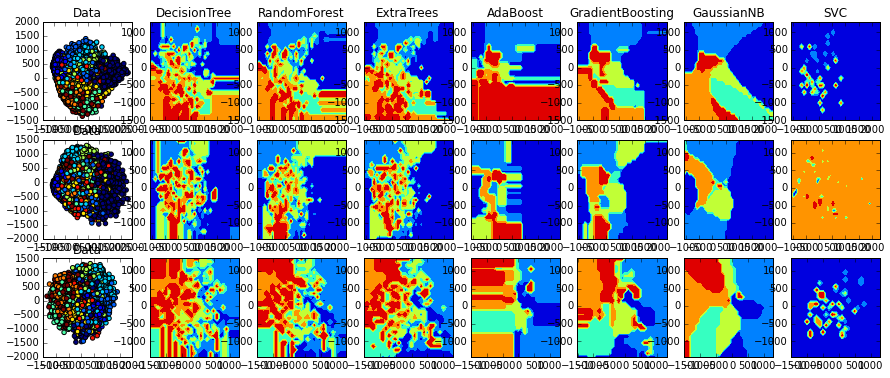

In [195]:
# parameters
plot_step = 100  # fine step width for decision surface contours
RANDOM_SEED = 42  # fix the seed on each iteration
cmap = plt.cm.jet

figure(num=1, figsize=(15, 6), dpi=100, facecolor='w', edgecolor='k') # plot results
plot_idx = 1
for pair in pairs:
    plt.subplot(len(pairs), len(models) + 1, plot_idx)
    plt.title("Data")
    plt.scatter(proj_test[:, pair[0]], proj_test[:, pair[1]], c=y_test)
    plot_idx += 1
    
    for model in models:
        X = proj_train[:, pair]
        y = y_train
        Xt = proj_test[:, pair]
        yt = y_test
        
        # Train
        clf = clone(model)
        clf = model.fit(X, y)

        scores = clf.score(Xt, yt)
        
        # Create a title for each column and the console by using str() and
        # slicing away useless parts of the string
        model_title = str(type(model)).split(".")[-1][:-2]
        if model_title.endswith('Classifier'):
            model_title = model_title[:-len("Classifier")]
        #print str(type(model)).split(".")[-1][:-2]
        model_details = model_title
        if hasattr(model, "estimators_"):
            model_details += " with {} estimators".format(len(model.estimators_))
        print( model_details + " with features", pair, "has a score of", scores )

        plt.subplot(len(pairs), len(models) + 1, plot_idx)
        if plot_idx <= len(models) + 1:
            # Add a title at the top of each column
            plt.title(model_title)

        # Now plot the decision boundary using a fine mesh as input to a
        # filled contour plot
        x_min, x_max = X[:, 0].min(), X[:, 0].max()
        y_min, y_max = X[:, 1].min(), X[:, 1].max()
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z, cmap=cmap)

        plot_idx += 1  # move on to the next plot in sequence

In [212]:
# check best algorithm
clf = ExtraTreesClassifier(n_estimators=n_estimators*100)
clf.fit(X_train, y_train)

# use the model to predict the labels of the test data
predicted = clf.predict(X_test)
expected = y_test

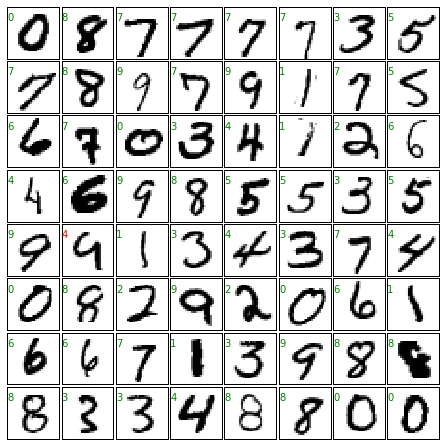

In [216]:
# copied from examples 
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i].reshape(28, 28), cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    if predicted[i] == expected[i]:
        ax.text(0, 7, str(predicted[i]), color='green')
    else:
        ax.text(0, 7, str(predicted[i]), color='red')

In [217]:
# accuracy
matches = (predicted == expected)
matches.sum() / float(len(matches))

0.96971428571428575

In [218]:
# f1 score
from sklearn import metrics
print metrics.classification_report(expected, predicted)

             precision    recall  f1-score   support

          0       0.98      0.99      0.99      1069
          1       0.98      0.98      0.98      1168
          2       0.97      0.97      0.97      1046
          3       0.96      0.96      0.96      1070
          4       0.97      0.97      0.97      1046
          5       0.96      0.96      0.96       946
          6       0.98      0.98      0.98      1085
          7       0.98      0.97      0.97      1044
          8       0.96      0.96      0.96       954
          9       0.96      0.94      0.95      1072

avg / total       0.97      0.97      0.97     10500



In [219]:
# confusion matrix
print metrics.confusion_matrix(expected, predicted)

[[1062    0    0    0    0    1    3    0    3    0]
 [   0 1148    6    7    2    0    0    3    2    0]
 [   6    1 1013    4    4    1    1    9    5    2]
 [   1    0    6 1028    2   14    3    4    8    4]
 [   3    2    1    0 1019    0    7    0    1   13]
 [   1    0    0   10    2  912    8    1    8    4]
 [   5    1    1    0    2    7 1065    0    4    0]
 [   0    3    8    2    0    0    0 1015    2   14]
 [   1    7    1    7    4    8    2    0  915    9]
 [   5    4    4   18   19    3    0    9    5 1005]]


In [220]:
# check best algorithm
clf = ExtraTreesClassifier(n_estimators=n_estimators*100)
clf.fit(mnist_train[:,1:], mnist_train[:,0])

# use the model to predict the labels of the test data
predicted = clf.predict(mnist_test)

In [226]:
with open("predicted.txt", 'w') as f:
    f.write('ImageId,Label\n')
    for i in range(len(predicted)):
        f.write(str(i + 1) + ',' + str(predicted[i]) + '\n')